In [10]:
#Exploratory Data Analysis for Stock prices
#with focus on bank stocks and analysing theeir progress through financial cricis 2008 until 2016
#we gonna read data using yahoo api so we need to import datareader
from pandas_datareader import data, wb
import os
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline

In [39]:
#reading data for 6 different banks and storing in different dataframes
# Bank of America
# CitiGroup
# Goldman Sachs
# JPMorgan Chase
# Morgan Stanley
# Wells Fargo
start = datetime.date(2006,1,1)
end = datetime.date(2016,1,1)
api_key=' VXNVQDGK5K88B6RU'
BAC = data.DataReader("BAC",'av-daily',start,end,api_key=api_key)
C = data.DataReader("C",'av-daily',start,end,api_key=api_key)
GS = data.DataReader("GS",'av-daily',start,end,api_key=api_key)
JPM = data.DataReader("JPM",'av-daily',start,end,api_key=api_key)
MS = data.DataReader("MS",'av-daily',start,end,api_key=api_key)
WFC = data.DataReader("WFC",'av-daily',start,end,api_key=api_key)
WFC.head()

,open,high,low,close,volume
2006-01-03,63.20,63.95,62.39,63.80,5508200
2006-01-04,63.60,63.64,62.73,63.06,5435000
2006-01-05,63.00,63.11,62.62,62.99,5079000
2006-01-06,63.16,63.55,62.77,63.36,4201900
2006-01-09,63.35,63.65,63.11,63.35,2809800


In [40]:
#creating a list of tickers alphabetically
tickers = ['BAC','C','GS','JPM','MS','WFC']
#concat the dataframes into a single one based on the tickers
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],keys=tickers,axis = 1)
bank_stocks.head()
#setting the column names
bank_stocks.columns.names =['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    open   high    low  close    volume   open   high    low  close   
2006-01-03   46.92  47.18  46.15  47.08  16296700  49.00  49.38  48.11  49.29   
2006-01-04   47.00  47.24  46.45  46.58  17757900  48.86  49.10  48.35  48.38   
2006-01-05   46.58  46.83  46.32  46.64  14970700  48.44  48.78  48.40  48.62   
2006-01-06   46.80  46.91  46.35  46.57  12599800  48.88  48.90  48.20  48.62   
2006-01-09   46.72  46.97  46.36  46.60  15619400  48.60  48.74  48.30  48.39   

Bank Ticker            ...     MS                                    WFC  \
Stock Info     volume  ...   open   high      low  close   volume   open   
2006-01-03   15376000  ...  57.17  58.49  56.7400  58.31  5377000  63.20   
2006-01-04   18709000  ...  58.70  59.28  58.3500  58.35  7977800  63.60   
2006-01-05   11431000  ...  58.55  58.59  58.0200  58.51  5778000  63.00   
2006-01-06   13702000  ...  58.77  58.85  58.0500  58.57  6889800  63.16   
2006-01-09   16807000  ...  58.63  59.29  58.6244  59.19  4144500  63.35   

Bank Ticker                                
Stock Info    high    low  close   volume  
2006-01-03   63.95  62.39  63.80  5508200  
2006-01-04   63.64  62.73  63.06  5435000  
2006-01-05   63.11  62.62  62.99  5079000  
2006-01-06   63.55  62.77  63.36  4201900  
2006-01-09   63.65  63.11  63.35  2809800  

[5 rows x 30 columns]

In [42]:
#retrieving max "close" price for each bank
bank_stocks.xs(key ='close', level='Stock Info', axis=1).max()

Bank Ticker
BAC     54.90
C       60.34
GS     247.92
JPM     70.08
MS      89.30
WFC     73.00
dtype: float64

In [45]:
#calculating the returns of each bank stock
#defining an empty dataframe called returns
returns = pd.DataFrame()
for x in tickers:
     returns[x + 'Return'] = bank_stocks[x]['close'].pct_change()
        
# returns.head()
returns.info


<bound method DataFrame.info of             BACReturn   CReturn  GSReturn  JPMReturn  MSReturn  WFCReturn
2006-01-03        NaN       NaN       NaN        NaN       NaN        NaN
2006-01-04  -0.010620 -0.018462 -0.013812  -0.014183  0.000686  -0.011599
2006-01-05   0.001288  0.004961 -0.000393   0.003029  0.002742  -0.001110
2006-01-06  -0.001501  0.000000  0.014169   0.007046  0.001025   0.005874
2006-01-09   0.000644 -0.004731  0.012030   0.016242  0.010586  -0.000158
...               ...       ...       ...        ...       ...        ...
2015-12-24  -0.004037  0.001520 -0.002624  -0.001948 -0.003681  -0.003997
2015-12-28  -0.008107 -0.006261 -0.004658  -0.003303 -0.009544  -0.002554
2015-12-29   0.008757  0.011455  0.010516   0.010395  0.011812   0.011156
2015-12-30  -0.013310 -0.012835 -0.008282  -0.007157 -0.009831  -0.007235
2015-12-31  -0.012903 -0.010516 -0.009780  -0.008410 -0.013031  -0.009656

[2517 rows x 6 columns]>

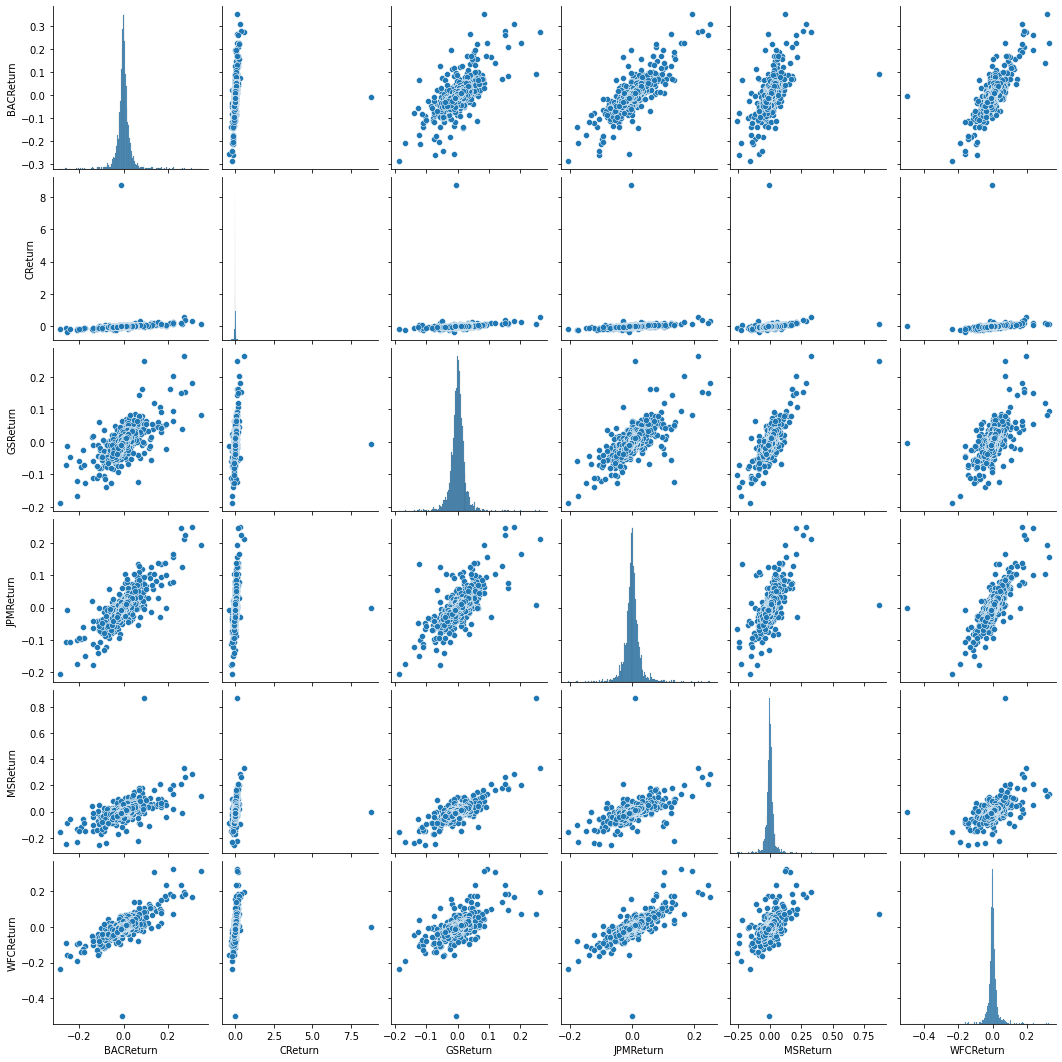

In [46]:
#creating a pairplot of returns
sns.pairplot(returns)

In [47]:
#which dates each bank had its best and worst return value
returns.idxmin()

BACReturn    2009-01-20
CReturn      2009-02-27
GSReturn     2009-01-20
JPMReturn    2009-01-20
MSReturn     2008-10-09
WFCReturn    2006-08-14
dtype: object

In [48]:
returns.idxmax()

BACReturn    2009-04-09
CReturn      2011-05-09
GSReturn     2008-11-24
JPMReturn    2009-01-21
MSReturn     2008-10-13
WFCReturn    2008-07-16
dtype: object

In [49]:
#analysing the strandard deviation of the returns
returns.std()

BACReturn    0.036628
CReturn      0.179066
GSReturn     0.025358
JPMReturn    0.027651
MSReturn     0.037821
WFCReturn    0.031838
dtype: float64

In [53]:
#std in year = 2015
returns.loc['2015-01-01':'2015-12-31'].std()
#reaskiest banks stock seems to be the MS

BACReturn    0.016163
CReturn      0.015289
GSReturn     0.014046
JPMReturn    0.014017
MSReturn     0.016249
WFCReturn    0.012591
dtype: float64

C:\Users\Arsene\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MSReturn', ylabel='Density'>

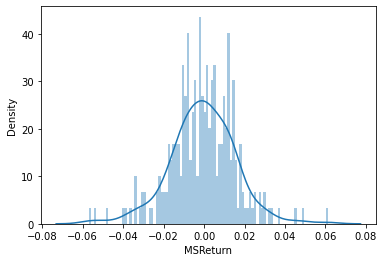

In [55]:
#creating a distplot of MS stock in 2015
sns.distplot(returns.loc['2015-01-01':'2015-12-31','MSReturn'], bins = 100)